## Описание и начальная работа с данными

#### Задачи

1. Рассчет:
* общего количества курсов в датасете,
* количества модулей на каждом курсе,
* количества уроков в каждом модуле на каждом курсе,
* медианного количества уроков в модуле на каждом курсе,
* количества учеников на каждом курсе
* минимального, максимального, среднего, медианного возраста студентов
* минимального, максимального, среднего, медианного возраста студентов на каждом курсе

2. Построение графика, отражающий количество студентов на каждом курсе

3. Построение графика, отражающего количество студентов на каждом курсе, а также информацию о сфере, к которой относится курс и медианным значением количества студентов.

4. Аналитическое описание полученных метрик

In [1]:
# Импорт библиотек и модулей
import pandas as pd
import datetime as DT
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
# Чтение файлов
course_contents = pd.read_csv('course_contents.csv')
courses = pd.read_csv('courses.csv', index_col=0)
progress_phases = pd.read_csv('progress_phases.csv')
progresses = pd.read_csv('progresses.csv')
students = pd.read_csv('students.csv')

In [3]:
# Соединение датафреймов
df = progress_phases.merge(progresses.rename(columns={'id':'progress_id'}))
df = df.merge(courses.rename(columns={'id':'course_id', 'title':'course_title', 'field':'course_field'}))
df = df.merge(course_contents)
df.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,3b9dce04f32da32763124602557f92a3,2,4,done,2019-03-18 14:23:17.328374+00,2019-03-18 14:54:50.979612+00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
2,73e17a05355852fe65b785c82c37d1ad,2,4,done,2019-07-09 09:18:46.19862+00,2019-07-11 08:03:09.222385+00,ed235f47e16da6e83d3f1cb511f38ea6,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
3,cc3eb34ae49c719648352c4175daee88,2,4,done,2018-07-27 15:39:17.666629+00,2018-07-27 16:13:55.086871+00,59e8681cb7b5c8043ae1aac10c8053ca,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
4,04ace4fe130d90c801e24eea13ee808e,2,4,done,2019-04-24 18:42:40.272854+00,2019-04-24 18:44:57.507857+00,c16250079190337fe9074736e33eecb2,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False


### 1. Расчет основных метрик

In [4]:
# Общее количество курсов
df.groupby('course_id').ngroups

15

In [5]:
# Количество модулей на каждом курсе
df.groupby('course_title')['module_title'].nunique().sort_values()

course_title
PHP-разработчик с 0 до PRO. Часть 1     8
Веб-вёрстка для начинающих 2.0          8
Excel Базовый                           9
Java-разработчик c нуля                 9
SMM-маркетолог от А до Я               11
Java-разработчик                       17
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Руководитель digital-проектов          17
JavaScript с нуля                      18
Интернет-маркетолог от Ingate          18
Веб-дизайн с нуля 2.0                  19
UX-дизайн                              20
Веб-разработчик                        20
Анимация интерфейсов                   21
Name: module_title, dtype: int64

In [6]:
# Количество уроков в каждом модуле на каждом курсе
df_course_numbers = df.groupby(['course_title', 'module_title'])[['lesson_title']].nunique()
df_course_numbers.head(15)

lesson_title
course_title     module_title                                                    
Excel Базовый     Визуализация данных Excel                                     5
                 Основной функционал Excel                                     11
                 Основной функционал Excel (продолжение)                        7
                 Сводные таблицы Excel                                          5
                 Формулы и функции Excel. Более сложные формулы                 5
                 Формулы и функции Excel. Введение                              3
                 Формулы и функции Excel. Продолжаем работать с ...             7
                 Формулы и функции Excel. Работа с ошибками, про...             5
                 Экзаменационная работа                                         1
Java-разработчик Вводный модуль                                                 8
                 Веб-приложения: формы, заголовки и сессии                      6
                 Внешний вид GUI и рисование                                    7
                 Заключительный модуль                                          8
                 Итоговая тема                                                  1
                 Массивы и коллекции                                            7

In [7]:
# Медианное количество уроков в модуле по курсам
df_course_numbers.groupby('course_title')[['lesson_title']].median().sort_values(by='lesson_title')

,lesson_title
course_title,
Веб-разработчик,2.0
Анимация интерфейсов,3.0
Веб-дизайн Базовый,3.0
UX-дизайн,3.5
PHP-разработчик с 0 до PRO. Часть 1,4.0
Веб-дизайн с нуля 2.0,4.0
Excel Базовый,5.0
Веб-дизайн PRO 2.0,5.0
Руководитель digital-проектов,5.0


In [8]:
# Количество учеников на каждом курсе
df.groupby('course_title')[['student_id']].nunique().sort_values(by='student_id')

,student_id
course_title,
SMM-маркетолог от А до Я,506
Веб-дизайн Базовый,518
Java-разработчик c нуля,581
Анимация интерфейсов,598
Веб-разработчик,628
Руководитель digital-проектов,685
Java-разработчик,763
Excel Базовый,782
PHP-разработчик с 0 до PRO. Часть 1,854


In [9]:
# Минимальный, максимальный, средний, медианный возраст студентов

# Преобразуем столбец 'birthday' в тип datetime
students['birthday'] = pd.to_datetime(students['birthday'], errors='coerce')   

# Создаем столбец для возраста
now = DT.datetime.now()
students['age'] = (now - students['birthday']).astype('timedelta64[Y]')
students.head()

,id_,id,city,birthday,age
0,1325,35e8a1938b9a33d5e45c8f4451c4309a,NaN,NaT,NaN
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,41.0
2,8972,2033122d7c9b24b36eebc468d5259642,NaN,NaT,NaN
3,9235,a6ae278c0eab719b3784e5ea147c128f,Москва,NaT,NaN
4,9588,51b25c9afd20d178ef3c07276df38e2d,Великий Новгород,NaT,NaN


In [10]:
# Подсчитываем необходимые показатели по строкам, в которых дата рождения не указана некорректно
students[students['age'] > 0].agg(['min', 'max', 'mean', 'median'])['age']

min         1.000000
max       136.000000
mean       30.119521
median     29.000000
Name: age, dtype: float64

In [11]:
# В датасете встречаются некорректные данные по дате рождения, так как данные по минимуму и 
# максимуму нереалистичные

# Зададим новое условие: возьмем только те строки, где возраст студентов находится между 14 и 100 годами
students[(students['age'] >= 14) & (students['age'] <= 100)].agg(['min', 'max', 'mean', 'median'])['age']

min        14.000000
max       100.000000
mean       30.170226
median     30.000000
Name: age, dtype: float64

In [12]:
# Данные практически не изменились, показатели среднего и медианы остались теми же самыми, это значит, 
# что выбросов не так много и они не сильно влияют на среднее и медиану

In [13]:
# Считаем минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

# Объединение датафрейма students с большим датафреймом
df_full = df.merge(students.rename(columns={'id':'student_id'}))
df_full.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework,id_,city,birthday,age
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,20469,Санкт-Петербург,1984-11-30,36.0
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False,20469,Санкт-Петербург,1984-11-30,36.0
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False,20469,Санкт-Петербург,1984-11-30,36.0
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False,20469,Санкт-Петербург,1984-11-30,36.0
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,20469,Санкт-Петербург,1984-11-30,36.0


In [14]:
# Подсчет необходимых показателей. Берем в учет только строки, в которых возраст студента находится между 14 и 100
df_full[(df_full['age'] >= 14) & (df_full['age'] <= 100)]\
    .groupby('course_title')\
    .agg(['min', 'max', 'mean', 'median'])['age']

,min,max,mean,median
course_title,,,,
Excel Базовый,17.0,62.0,34.080585,34.0
Java-разработчик,15.0,65.0,30.588836,30.0
Java-разработчик c нуля,15.0,56.0,30.849937,30.0
JavaScript с нуля,14.0,60.0,29.471577,29.0
PHP-разработчик с 0 до PRO. Часть 1,14.0,76.0,32.007705,31.0
SMM-маркетолог от А до Я,18.0,53.0,29.826800,29.0
UX-дизайн,16.0,86.0,31.307391,31.0
Анимация интерфейсов,16.0,52.0,30.728388,30.0
Веб-вёрстка для начинающих 2.0,14.0,60.0,29.594324,29.0


### 2. Визуализация количества студентов на каждом курсе

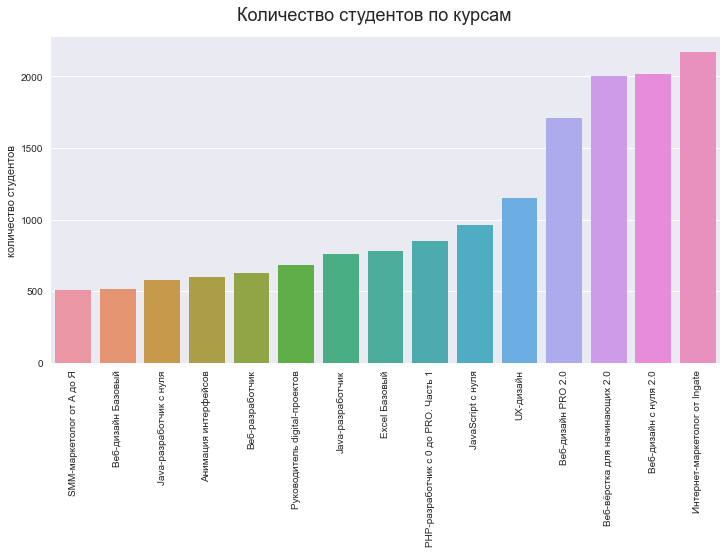

In [15]:
# датафрейм для построения графика
students_by_course = df.groupby('course_title')[['student_id']].nunique().sort_values(by='student_id')

# Построение графика
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=students_by_course, x=students_by_course.index, y='student_id', ax=ax)

# Названия и параметры осей, название графика
ax.set_ylabel('количество студентов')
ax.set_xlabel('')
ax.tick_params('x', rotation=90)
plt.suptitle('Количество студентов по курсам', size=18, y=0.95)

plt.show()

### 3. График, отображающий количество студентов на каждом курсе, с информацией о сфере, к которой относится каждый курс, и медианой

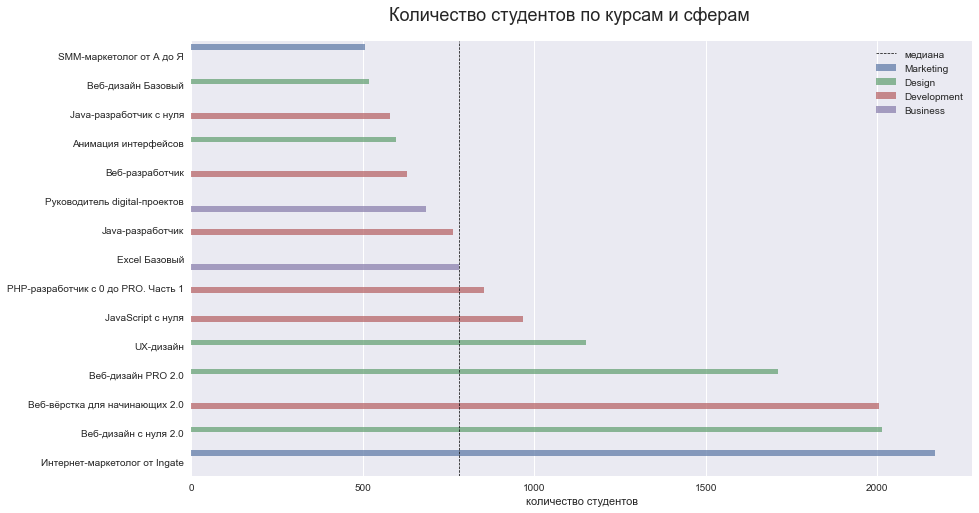

In [16]:
# Датафрейм для построения графика
students_by_course2 = df\
    .groupby(['course_title', 'course_field'])[['student_id']]\
    .nunique()\
    .sort_values(by='student_id')\
    .reset_index()

# Построение графика
fig, ax = plt.subplots(figsize=(14,8))
sns.barplot(data=students_by_course2, y='course_title', x='student_id', hue='course_field', alpha=0.7) 
# (В задании написано, поставить прозрачность 0.1, но тогда график совсем нечитаемый получается)

# Названия осей
ax.set_xlabel('количество студентов')
ax.set_ylabel('')

# Медиана
line = students_by_course2['student_id'].median()
ax.axvline(x=line, linewidth=0.7, color='black', linestyle='--', label='медиана')

# Легенда
ax.legend()

# Название графика
plt.suptitle('Количество студентов по курсам и сферам', size=18, y=0.94)
plt.show()

### 4. Основные выводы по разделу

В датасете представлено 15 различных курсов, каждый из которых состоит из модулей, которые, в свою очередь, состоят из уроков.

На большинстве курсов количество модулей примерно одинаковое. Так, в 10 курсах количество модулей находится в промежутке между 17 и 21. При этом наибольшее количество модулей - в курсе "Анимация интерфейсов". Наименьшее количество модулей (8) содержатся в курсах "PHP-разработчик с 0 до PRO. Часть 1" и "Веб-вёрстка для начинающих 2.0".

Количество уроков в каждом модуле может быть очень разным. Так, в некоторых модулях количество уроков равно 1 (это, например, экзаменационные работы), а в других может превышать 10.

Медианные значения количества уроков по модулям различны для разных курсов. Так, наименьшие медианные (серединные) значения (2 и 3) наблюдаются на таких курсах как "Веб-разработчик", "Анимация интерфейсов", "Веб-дизайн Базовый". Наибольшее же медианное значение количества уроков в модуле - на курсе "Java-разработчик с нуля", где оно равно 10.

Наибольшее число студентов обучаются на курсах "Интернет-маркетолог от Ingate", "Веб-дизайн с нуля 2.0" и "Веб-вёрстка для начинающих 2.0". Каждый из данных курсов проходит более 2000 студентов. Следующими по популярности идут курс "Веб-дизайн PRO 2.0" (1711 студентов) и "UX-дизайн" (1151 студент). На остальных курсах обучается менее 1000 студентов. Наименьшее популярными являются курсы "SMM-маркетолог от А до Я" и "Веб-дизайн Базовый": на каждом из них числится около 500 студентов.

Таким образом, курсы по сферам "Marketing", "Design" и "Development" достаточно равномерно распределены по количеству студентов: среди таких курсов есть как популярные, так и менее популярные курсы. Курсы же направления "Business" характеризуются средней популярностью: количество студентов на них близко к меданному.

Анализ возраста студентов представляет определенные трудности, так как, возможно, при регистрации студенты некорректно указывают дату своего рождения. По этой причине, затруднительно определить минимальный и максимальный возраст студентов. Однако среднее и медианное значения возраста достаточно устойчивы к выбросам и скорее всего отражают реальную картину. Так, средний возраст студентов составляет 30 лет, медианный - 29.

Наибольшие средние и медианные значения возраста наблюдаются у студентов, обучающихся на таких курсах, как "Excel Базовый" (34 года оба показателя), "Руководитель digital-проекта" (32,5 и 32 года соответственно). Однако наименьшие средние и медианные значения составляют всего лишь 28 лет, поэтому сильной зависимости между выбором курса от возрастом, вероятнее всего, не существует.